## INTERNATIONAL COINS (LESS NO. OF COINS)

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

img = cv2.imread('intrcoins.jpg')

resized = cv2.resize(img, None, fx=0.50, fy=0.50)
cv2.imwrite('rzimg.jpg', resized)

True

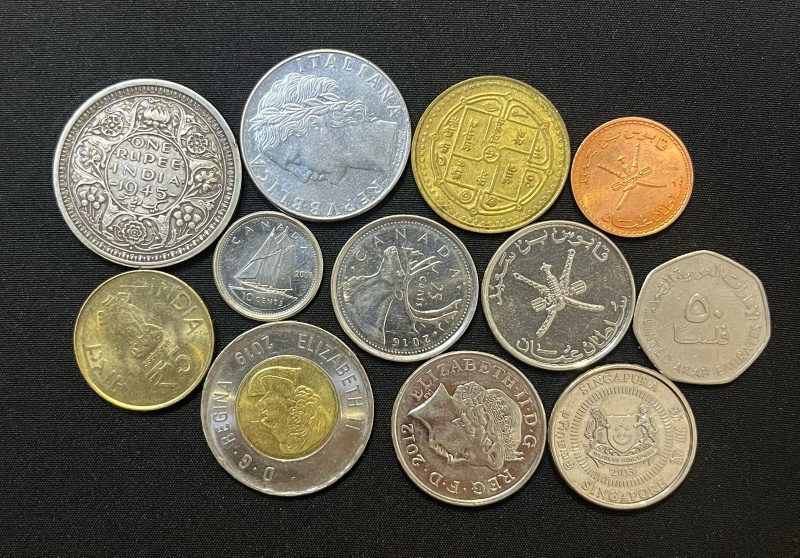

In [ ]:
rzimg = cv2.imread('rzimg.jpg')
cv2_imshow(rzimg)

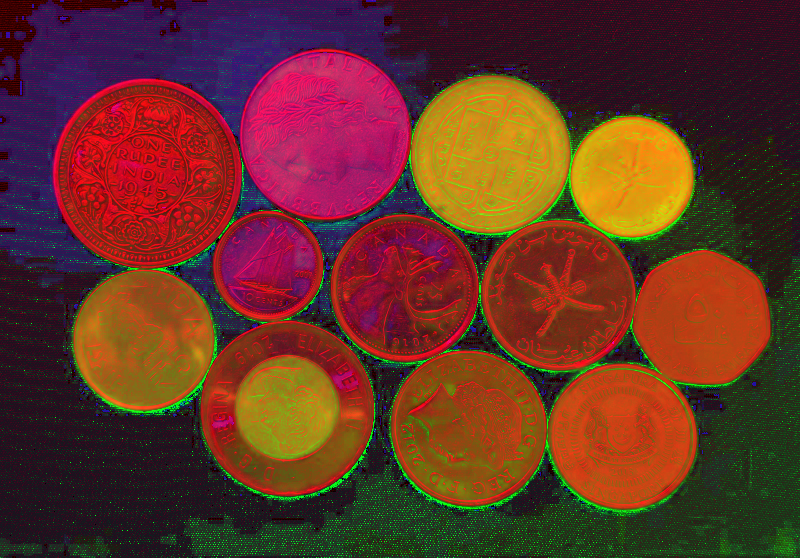

In [ ]:
from matplotlib import pyplot as plt
# Convert to HSV
hsv = cv2.cvtColor(rzimg, cv2.COLOR_BGR2HSV)
cv2_imshow(hsv)

In [ ]:
# 2. Reshape and apply K-Means clustering
pixel_vals = rzimg.reshape((-1, 3))
pixel_vals = np.float32(pixel_vals)

# Define criteria and apply kmeans
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
k = 3  # Number of color clusters
retval, labels, centers = cv2.kmeans(pixel_vals, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Convert data to 8-bit values
centers = np.uint8(centers)
segmented_data = centers[labels.flatten()]
segmented_image = segmented_data.reshape((rzimg.shape))

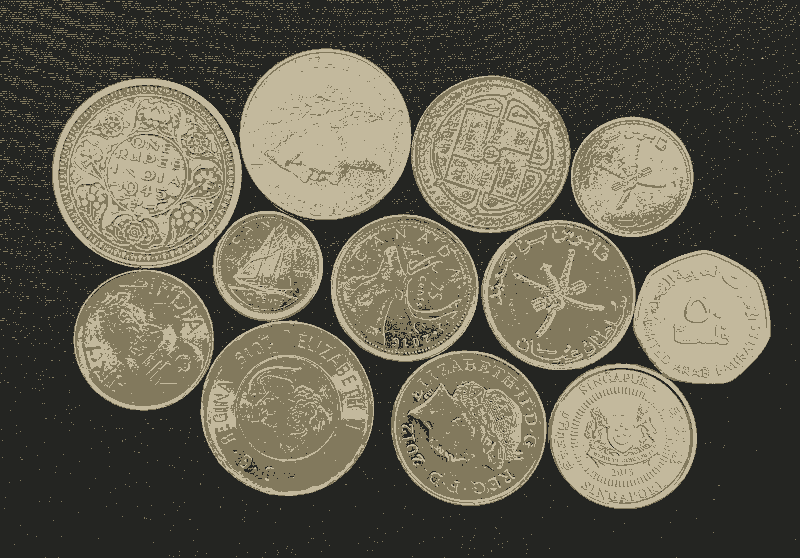

In [ ]:
cv2_imshow(segmented_image)

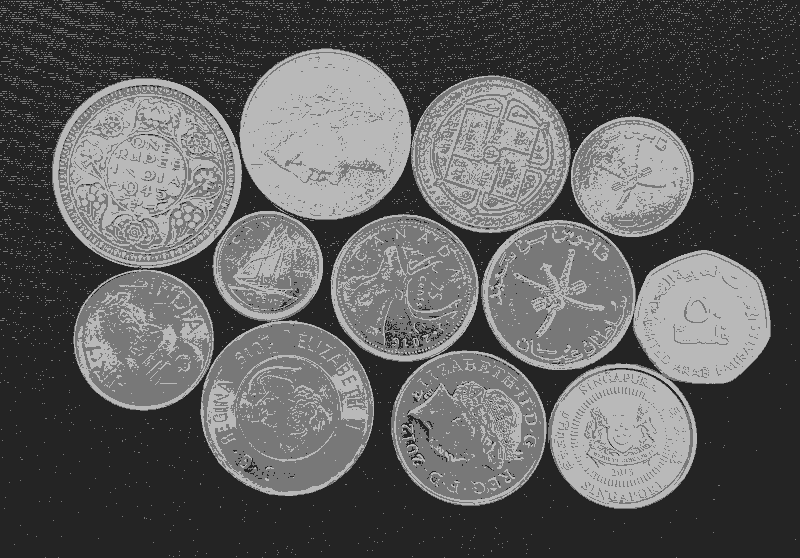

In [ ]:
gray_segmented = cv2.cvtColor(segmented_image, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray_segmented)

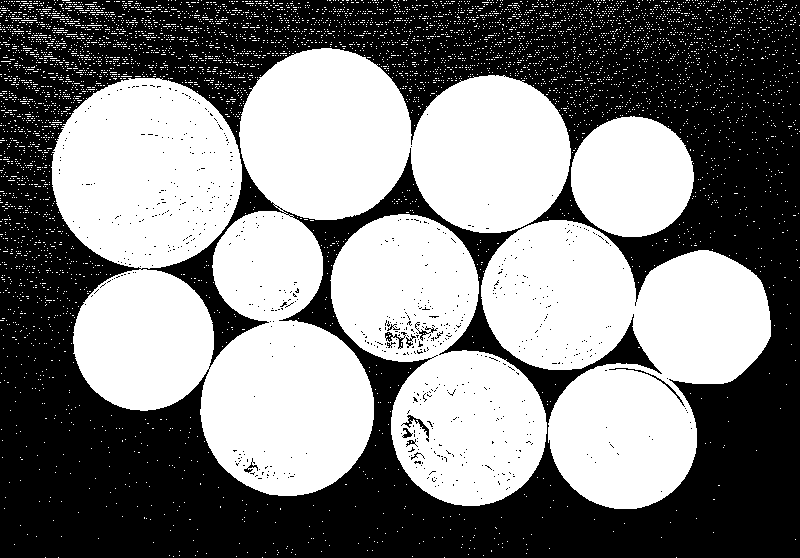

In [ ]:
inverted = cv2.bitwise_not(gray_segmented)  #make coins white

_, thresh = cv2.threshold(inverted, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
cv2_imshow(thresh)

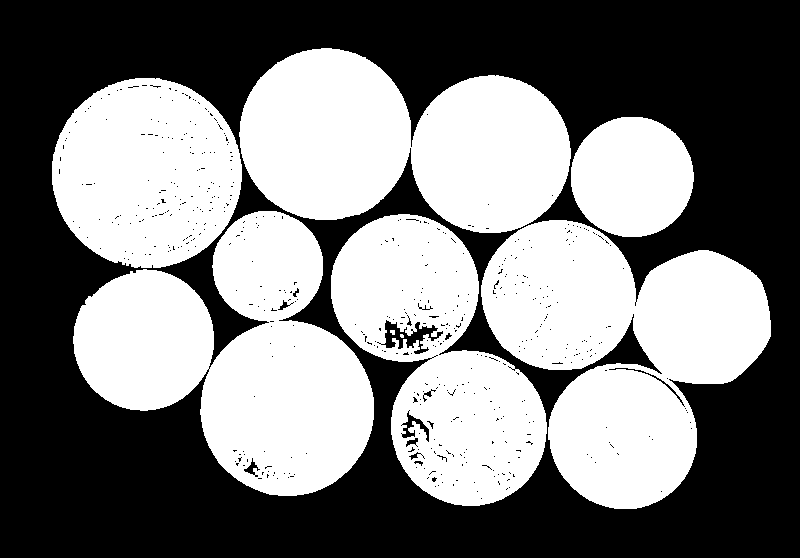

In [ ]:
# morphological operations applied
kernel = np.ones((3,3), np.uint8)
opened = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=1)
cv2_imshow(opened)

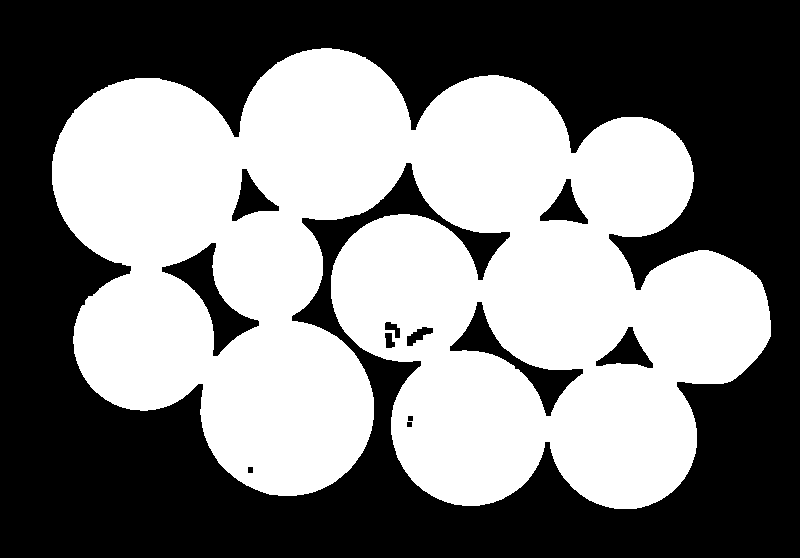

In [ ]:
closed = cv2.morphologyEx(opened, cv2.MORPH_CLOSE, kernel, iterations=2)
cv2_imshow(closed)

In [ ]:
contours, _ = cv2.findContours(opened, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
coin_count = 0
for cnt in contours:
    area = cv2.contourArea(cnt)
    if area > 1000:  # Adjust threshold based on your image
        coin_count += 1


In [ ]:
# Make a copy of the original image
output_image = rzimg.copy()

# Draw contours that pass the threshold
for cnt in contours:
    area = cv2.contourArea(cnt)
    if area > 1000:  # example threshold
        cv2.drawContours(output_image, [cnt], -1, (0, 255, 0), 2)  # green contour


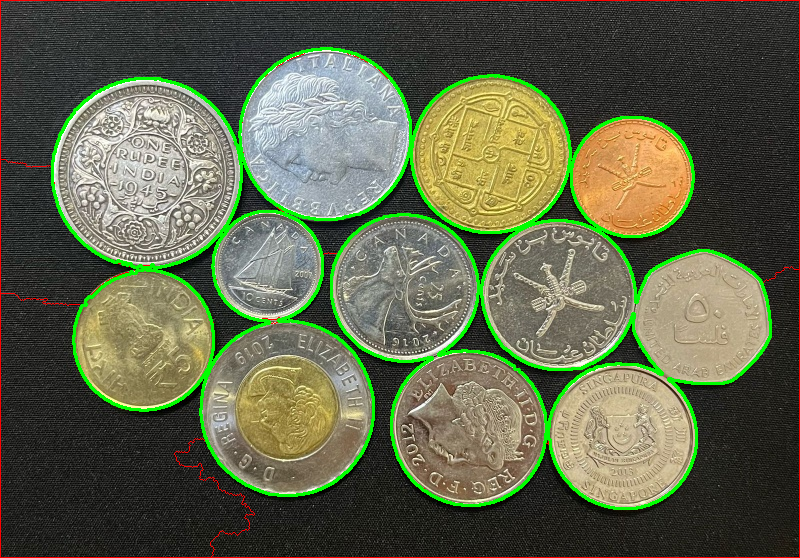

In [ ]:
cv2_imshow(output_image)

### Currency recognition

In [ ]:
''' APPLYING OCR + SHAPE DETECTION'''
!pip install pytesseract
import pytesseract

for cnt in contours:
    area = cv2.contourArea(cnt)
    if area > 1000:  # You may adjust this threshold based on your image
        coin_count += 1

        # Get bounding box
        x, y, w, h = cv2.boundingRect(cnt)
        coin_roi = img[y:y+h, x:x+w]

       ''' # OCR Preprocessing
        gray_roi = cv2.cvtColor(coin_roi, cv2.COLOR_BGR2GRAY)
        _, roi_thresh = cv2.threshold(gray_roi, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

        # OCR
        text = pytesseract.image_to_string(roi_thresh, config='--psm 6')'''
        print(f"[Coin {coin_count}] OCR Text: {text.strip()}")

        # Shape detection
        epsilon = 0.01 * cv2.arcLength(cnt, True)
        approx = cv2.approxPolyDP(cnt, epsilon, True)
        if len(approx) >= 8:
            shape = "Circle"
        elif len(approx) == 6:
            shape = "Hexagon"
        else:
            shape = "Polygon"
        print(f"[Coin {coin_count}] Shape: {shape}")

        # Display detected region
        cv2.rectangle(rzimg, (x, y), (x+w, y+h), (0, 255, 0), 2)
        cv2.putText(rzimg, f"{shape}", (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 0, 0), 2)

[Coin 8] OCR Text: po
[Coin 8] Shape: Circle
[Coin 9] OCR Text: ZT BR, ‘es
a Vue
( AY
AEA)
Vesa:
Weaeh.
Wa
, GES
SPS ae
/ ; y ea SI
aI be > Y
Lf ae’
BY) Seager!
[Coin 9] Shape: Circle
[Coin 10] OCR Text: Ss. PerycdS
aS ot sy
Gek

NEES
[Coin 10] Shape: Circle
[Coin 11] OCR Text: Re
si es
Seek
[Coin 11] Shape: Circle
[Coin 12] OCR Text: ‘s Ss
J
[Coin 12] Shape: Circle
[Coin 13] OCR Text: ey
ERE Rp,
[Coin 13] Shape: Circle
